In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import pickle

In [46]:
with open('features/features_encoder_pictures_with_no_buildings.pkl','rb') as f:
    features = pickle.load(f)
features.shape

(10886, 16, 16, 128)

In [9]:
features = features.reshape(features.shape[0], features.shape[1]* features.shape[2]* features.shape[3])
features.shape

(10886, 32768)

In [10]:
from sklearn.cluster import Birch
birch = Birch(n_clusters=100)
predictions = birch.fit_predict(features)
predictions

array([12, 36, 33, ...,  2,  3, 55], dtype=int64)

In [20]:
# with open('predictions.pkl','wb') as f:
#     pickle.dump(predictions, f)

In [16]:
img_folder = "../tripadvisor_dataset/tripadvisor_images_small/"
image_files=os.listdir(img_folder)


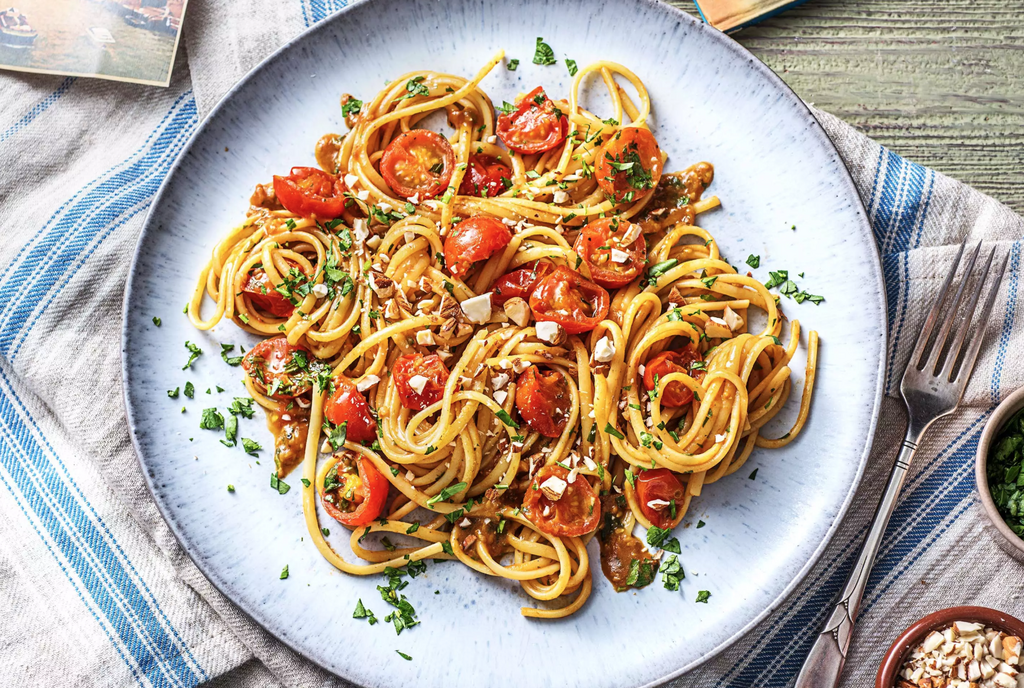

In [21]:
from fastai.vision.all import PILImage
img = PILImage.create('../pasta.png')
img

In [22]:
IMG_HEIGHT = 128
IMG_WIDTH = 128

img_resized = img.resize((IMG_HEIGHT,IMG_WIDTH))
img_resized = np.array(img_resized)
img_resized.shape


(128, 128, 3)

In [28]:
img_resized_model = img_resized.reshape(1, IMG_HEIGHT, IMG_WIDTH, 3)

In [34]:
model = keras.models.load_model("./model")
results = model.predict(img_resized_model)
results = results.reshape(results.shape[0], results.shape[1]* results.shape[2]* results.shape[3])
results.shape

1/1 [==============================] - 0s 301ms/step


(1, 32768)

In [36]:
pasta_cluster = birch.predict(results)
pasta_cluster

array([89], dtype=int64)

In [37]:
indices = np.where(predictions == pasta_cluster)[0]
print(len(indices))
file_names = [image_files[i] for i in list(indices)]
unique_restaurants = set()
for file in file_names:
    unique_restaurants.add(int(file.split("_")[0]))
unique_restaurants

56


{1065393,
 1076730,
 1757529,
 2196877,
 2370930,
 3228265,
 3265769,
 3443862,
 3469865,
 3483967,
 3573432,
 3589154,
 3653136,
 3685527,
 3809633,
 4106535,
 4291574,
 4481629,
 5500931,
 6000893,
 10049165,
 10135239,
 10629980,
 10644250,
 10712016,
 11670911,
 11748881,
 11956137,
 12186480,
 12309687,
 12408121,
 12489563,
 12867941,
 12945389,
 12961849,
 13146426,
 13206345,
 13302751,
 14051083,
 14210711,
 14990435,
 15194988,
 16754132,
 17659553,
 17689296,
 18455497,
 19903457,
 19923333,
 21116392,
 21374383,
 23444367,
 23469022,
 23751698,
 23775832,
 23870872,
 24124233}

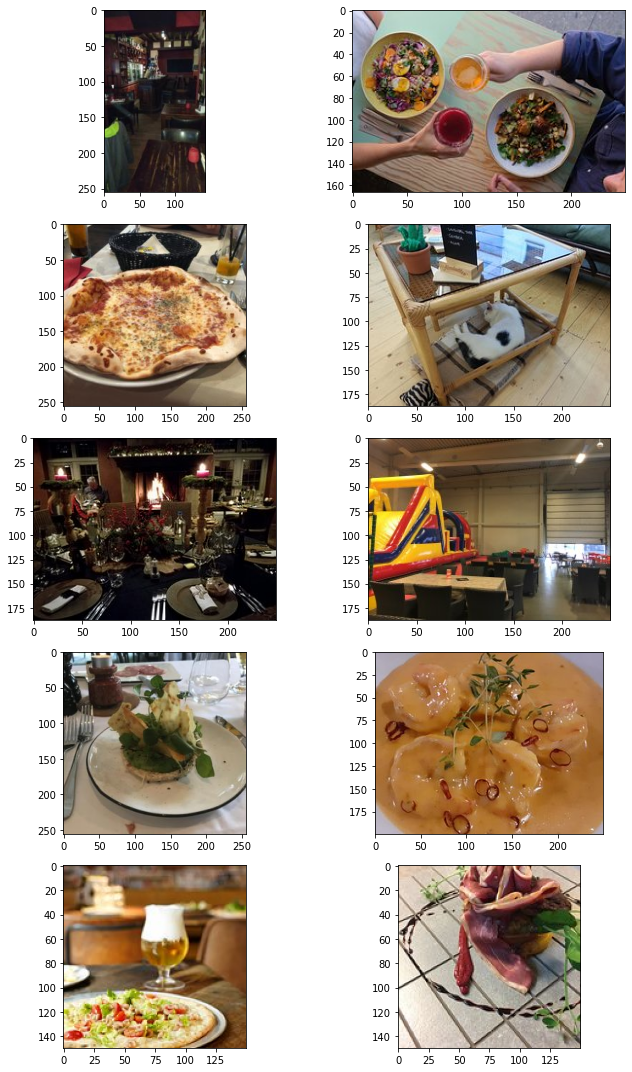

In [42]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,15))

for i in range(0,10):
    plt.subplot(5,2,i+1)
    img = PILImage.create(img_folder + '/' + file_names[i])
    # restaurant name get be obtained in file_names[i]
    plt.imshow(img)
fig.tight_layout()
plt.show()